<a href="https://colab.research.google.com/github/BuiChiCuongs/BT_AI_W5/blob/main/BT_AI_W5_ProtFIS_20146167.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=23a1977131db20c00d5032002f4056087802067a2210d134dbc2565521e5a3f2
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


329.4261294261288


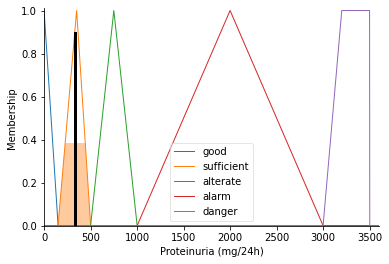

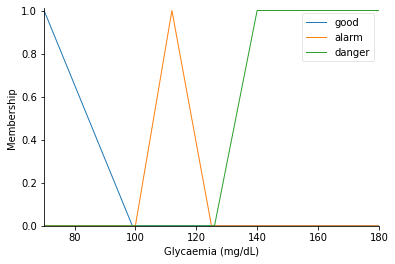

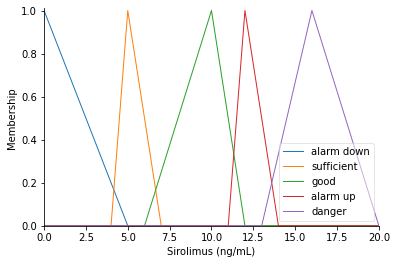

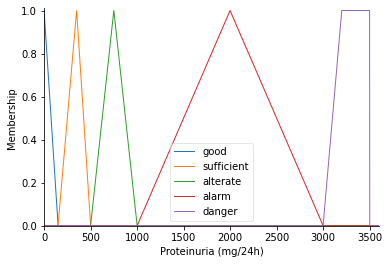

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Glycaemia = ctrl.Antecedent(np.arange(70,181,1),'Glycaemia (mg/dL)')
Sirolimus = ctrl.Antecedent(np.arange(0,21,1),'Sirolimus (ng/mL)')
Proteinuria = ctrl.Consequent(np.arange(0,3601,1),'Proteinuria (mg/24h)')

Glycaemia['good'] = fuzz.trimf(Glycaemia.universe,[70,70,99])
Glycaemia['alarm'] = fuzz.trimf(Glycaemia.universe,[100,112,125])
Glycaemia['danger'] = fuzz.trapmf(Glycaemia.universe,[126,140,180,180])

Sirolimus['alarm down'] = fuzz.trimf(Sirolimus.universe,[0,0,5])
Sirolimus['sufficient'] = fuzz.trimf(Sirolimus.universe,[4,5,7])
Sirolimus['good'] = fuzz.trimf(Sirolimus.universe,[6,10,12])
Sirolimus['alarm up'] = fuzz.trimf(Sirolimus.universe,[11,12,14])
Sirolimus['danger'] = fuzz.trimf(Sirolimus.universe,[13,16,20])

Proteinuria['good'] = fuzz.trimf(Proteinuria.universe,[0,0,150])
Proteinuria['sufficient'] = fuzz.trimf(Proteinuria.universe,[150,350,500])
Proteinuria['alterate'] = fuzz.trimf(Proteinuria.universe,[500,750,1000])
Proteinuria['alarm'] = fuzz.trimf(Proteinuria.universe,[1000,2000,3000])
Proteinuria['danger'] = fuzz.trapmf(Proteinuria.universe,[3000,3200,3500,3500])


rule1 = ctrl.Rule(Glycaemia['good'] & Sirolimus['good'], Proteinuria['good'])
rule2 = ctrl.Rule(Glycaemia['danger'] & Sirolimus['danger'], Proteinuria['danger'])
rule3 = ctrl.Rule(Glycaemia['good'] & Sirolimus['sufficient'], Proteinuria['sufficient'])
rule4 = ctrl.Rule(Glycaemia['alarm'] & Sirolimus['alarm up'], Proteinuria['alarm'])
rule5 = ctrl.Rule(Glycaemia['alarm'] & Sirolimus['sufficient'], Proteinuria['alterate'])
rule6 = ctrl.Rule(Glycaemia['good'] & Sirolimus['alarm up'], Proteinuria['alterate'])
rule7 = ctrl.Rule(Glycaemia['alarm'] & Sirolimus['good'], Proteinuria['sufficient'])
rule8 = ctrl.Rule(Glycaemia['good'] & Sirolimus['alarm down'], Proteinuria['sufficient'])

Protei_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                   rule8])

Protei = ctrl.ControlSystemSimulation(Protei_ctrl)

Protei.input['Glycaemia (mg/dL)'] = 120
Protei.input['Sirolimus (ng/mL)'] = 8
Protei.compute()
print(Protei.output['Proteinuria (mg/24h)'])
Proteinuria.view(sim=Protei)

Glycaemia.view()
Sirolimus.view()
Proteinuria.view()